#                       DATA SCIENCE & MACHINE LEARNING PIPELINE
---
Book Recomendations:
1. Story telling with data (Cole Knaflic)
2. Hands on Machine Learing (Aurellen Geron)
3. Krish Naik Youtube channel

## Speakers LinkedIn
[Christine Muthee](https://www.linkedin.com/in/christine-muthee-0411161b1/) 

[Munyala Eliud](https://www.linkedin.com/in/eliud-munyala/)

# PROJECT: Predicting Probability of Borrower Loan Default Using Machine Learning
---

###  Understanding the context 

In a project to predict loan default may be relevant in any situation where there is a need or desire to understand and manage the risks associated with lending money. i.e.
---
* A financial institution, such as a bank or credit union, may want to predict loan default in order to reduce the risk of lending and improve the performance of its loan portfolio.
* A lending platform, such as a peer-to-peer lending service, may want to predict loan default in order to improve the quality of its loan offerings and increase investor confidence.
* A government agency, such as a housing or small business administration, may want to predict loan default in order to better understand and address challenges in the lending market.
* A credit rating agency, such as Standard & Poor's or Moody's, may want to predict loan default in order to provide more accurate and useful ratings for different types of loans.
----
### a) Specifying the Data Analytic Question | Business Question
---
* What is the overall default rate for loans in our dataset?
* Are there any significant differences in default rates between different age groups?
*  Are there any significant differences in default rates between different experience levels?
* Can we identify any factors that are associated with higher or lower default rates, such as the borrower's , income level?
* Are there any specific segments of borrowers who have a higher default rate than others (e.g. Younger borowers, married and single, those who own houses or cars?
* Which specific city/state has the maximum loan defaulters.
* Which profession, city or state contains most defaulters and is it associated with the income levels.
* Can we build a model to predict the likelihood of default for individual loans, and how accurate is this model?
* Can we use the insights from our analysis to develop strategies for reducing default rates and improving loan performance?

### b) Defining the Metric for Success
---
* Achieving a low default rate for loans made using the model's predictions
* Developing a model with a high accuracy rate for predicting default. Other metrics should also be considered eg Precision and Recall 
* Identifying factors that are associated with higher or lower default rates and using this information to develop strategies for reducing default rates
* Implementing these strategies and seeing a corresponding decrease in default rates over time 
* Achieving a high return on investment for loans made using the model's predictions, compared to loans made without using the model
* Gaining a competitive advantage in the marketplace by being able to offer more favorable loan terms to borrowers who are less likely to default.



# 1. Data Loading and Understanding

In [ ]:
# Library Requirements

# Data manipulation and Analysis.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style = "darkgrid")
# filter warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning.
! pip install category_encoders
# preprocessing and data conversion
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

# ML Algorithims
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 660 kB/s 


#### NB: You need to have the notebook uploaded to your drive to facilitate an import of your drive and loading of your set from your drive.
Instructions for uploading your dataset.


1.   Access the google drive via :https://drive.google.com/
2.   Click on the +New icon and upload the file to your drive.



In [ ]:
# Loading data 
# This dataset belongs to a Hackathon organized by "Univ.AI"!!from google.colab import auth                             
from google.colab import drive
drive.mount('/content/drive')
# Loading data from the drive 
df=pd.read_csv("/content/drive/MyDrive/WTM_Ke_iHubWorkshop/Training Data.csv")
df.head()

Mounted at /content/drive


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
# Understanding the structure of the data
rows,columns= df.shape
print("Rows:",rows)
print("Columns:",columns)

Rows: 252000
Columns: 13


In [ ]:
# To understand the valeues we can visualize and those we cannot
df.nunique(axis=0)

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

We see that the data contains 252000 rows (basically representing our customers) and 13 columns which are their attributes.

In [ ]:
# The distribution and data types within our set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


#### The numerical columns include:
Customer Id, Income, Age, Experience, Current_Job_Yrs,Current_house_hrs and the risk flag. 
They can be thought of as measurable/quantitative.
#### The categorical columns: 
Married/Single,House_Ownership,Car_Ownership, Proffesion,City,State.
They involve names or qualities of the entity they represent (Qualitative information)

# Exploratory Data Analysis.

<p>Exploratory data analysis (EDA) is a critical step in the data science process that involves generating insights and understanding the structure and relationships in a dataset. There are many different methods of EDA, and the best approach will depend on the specific dataset and the questions you are trying to answer. Some common methods of EDA include:</p>

---
1. Visualizing data using graphs and plots: This is a powerful way to quickly identify trends, patterns, and relationships in the data. For example, you can use scatter plots to identify correlations between different variables, or use histograms to understand the distribution of data.

2. Summarizing data using descriptive statistics: Descriptive statistics are summary measures that can help you understand the central tendency, dispersion, and other key characteristics of a dataset. For example, you can use the mean and standard deviation to understand the average and spread of a dataset.

3. Identifying outliers and anomalies: Outliers and anomalies are data points that are significantly different from the rest of the dataset. They can be caused by errors in data collection or processing, or they may indicate interesting patterns that deserve further investigation.
---

<p>Testing hypotheses: EDA is often used to generate hypotheses about relationships in the data, which can then be tested using statistical methods. This can help you confirm or reject your initial assumptions about the data.</p>

## 1. Visualizing data using graphs and plots:

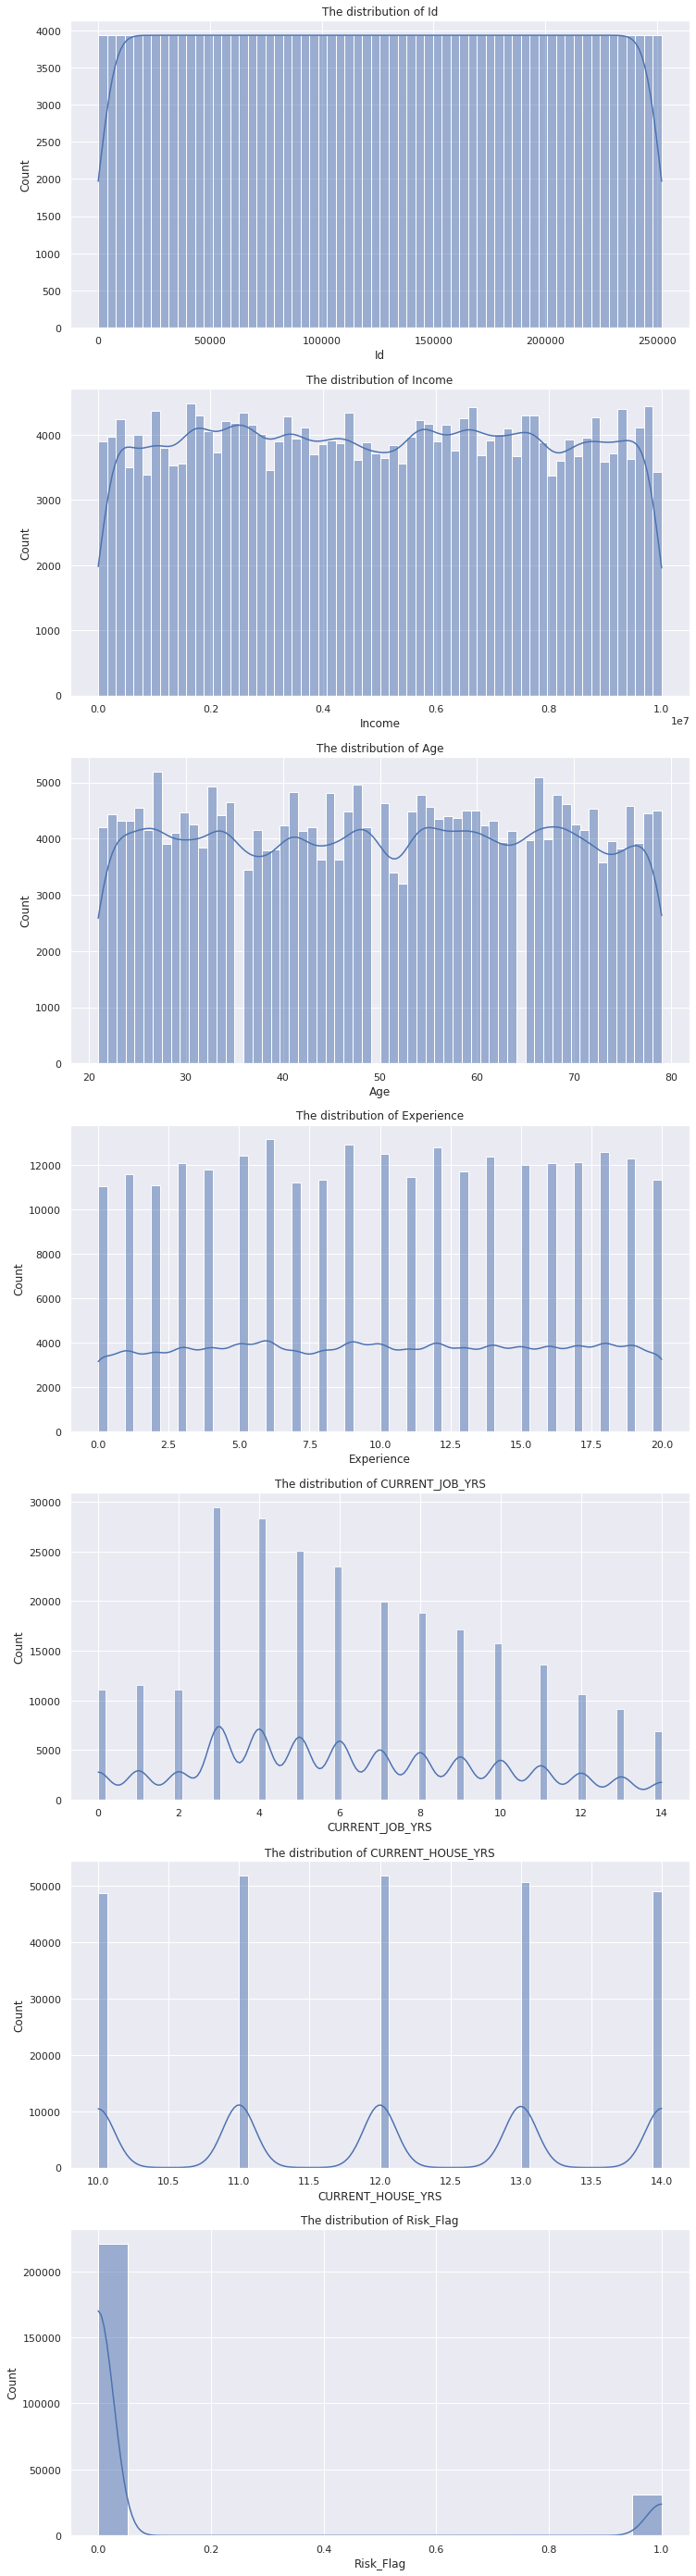

In [ ]:
# Understanding the distribution of our dataset
df.head()
# Distribution of numerical datasets
num_cols= df.select_dtypes(include=np.number).columns.tolist() 

# # Plotting a distplot of the numerical columns
fig,ax=plt.subplots(len(num_cols),figsize=(12,50))
for i,cols in enumerate(num_cols):
  sns.histplot(df[cols],ax=ax[i],kde=True) 
  ax[i].set_title('The distribution of '+format(cols))
plt.show()

####  A displot works like a histogram where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar. The Kernel density estimation is meant to smooth the observation and plot the underlying probability densities within the set.
#### 6 variables by virtue of being discrete numerical values exhibit a uniform distribution pattern with probabilities densities being uniform and varying slightly accross all random values of X.
#### The risk flag on the other hand displays a bernoulli distribution where random value X only takes in the value 0 or 1.


## Relationship between numerical values. 

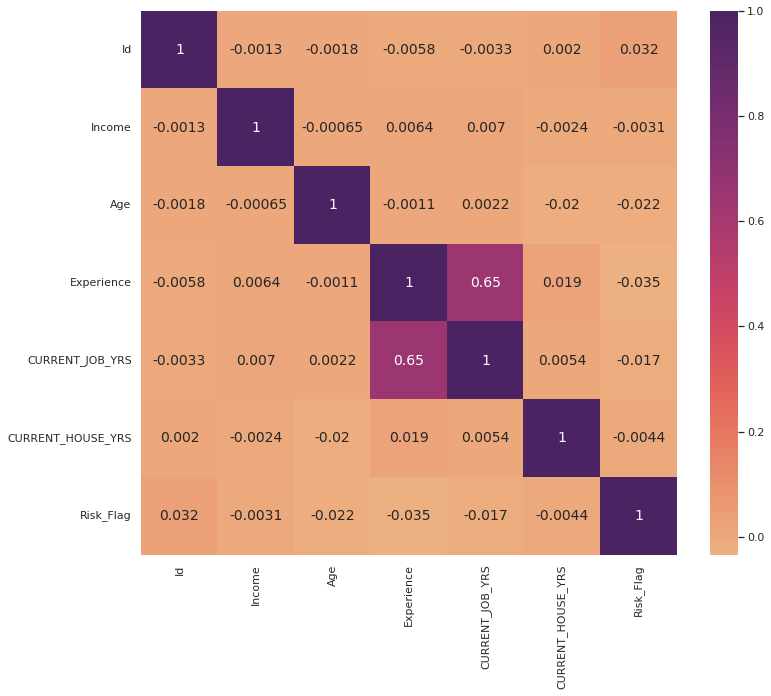

In [ ]:
# Understanding the Pearson's correlation coefficient.
fig, ax = plt.subplots(figsize=(12,10))
corr_matrix=df.corr()
corr_heatmap=sns.heatmap(corr_matrix,cmap='flare', annot=True, ax=ax, annot_kws={'size':14})
plt.show()

#### There is a positive correlation between Experience and Current job years in the dataset. Correlation is a statistical term describing the degree to which two variables move in coordination with one another.

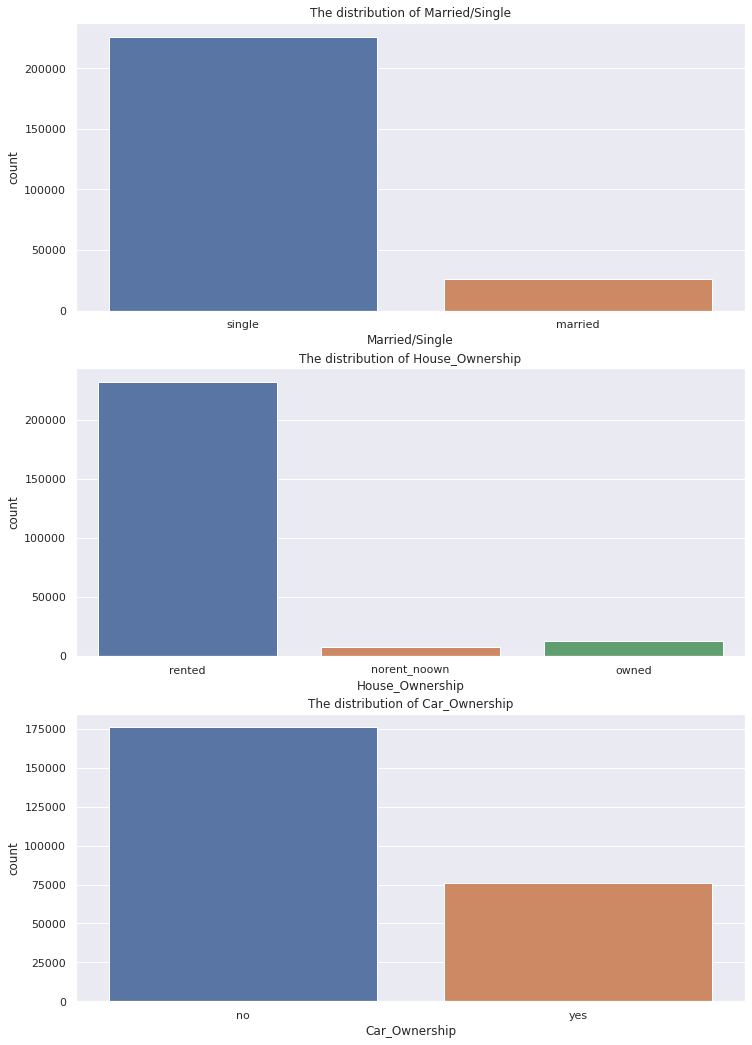

In [ ]:
# Vizualizing non numerical columns
cat_cols= df.select_dtypes(exclude=np.number).columns.tolist() 
cat_col=cat_cols[0:3]
# Vizualization using count plots
# # Plotting a distplot of the numerical columns
fig,ax=plt.subplots(len(cat_col),figsize=(12,18))
for i,cols in enumerate(cat_col):
  sns.countplot(df[cols],ax=ax[i]) 
  ax[i].set_title('The distribution of '+format(cols))

#### We can see the distribution of Marital status and House and Car Ownership for our customers.

In [ ]:
# Other non numeric columns
occup=df[cat_cols[3]].value_counts()
city=df[cat_cols[4]].value_counts()
state=df[cat_cols[5]].value_counts()


## 2. Summarizing data using descriptive statistics

In [ ]:
# Statistical summary
df[num_cols].describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


#### Based on our distribution plot,
*   We can see that the ID column contains unique values ranging from 1 to 252000.
*   Our customers have a mean income of 4.997117e+06. There is a big range between the minimum income and the maximum income. We have a large variation from the mean represented by the Standard Deviation indicating great variability in our set.
*   Our Customers Mean age is approximately 50 years. 
*   The experiences ranges from 0 to 20 years of experience with the average being 10 years.
*   The current job and house hours exhibit a similar form of distribution with multimodal characteristics.
*   Based on the nature of distribution in the risk flag, the random variable cannot take another value other than 0 or 1.





## 3. Identifying outliers and anomalies:

In [ ]:
# checking for missing values
df.isnull().any()

Id                   False
Income               False
Age                  False
Experience           False
Married/Single       False
House_Ownership      False
Car_Ownership        False
Profession           False
CITY                 False
STATE                False
CURRENT_JOB_YRS      False
CURRENT_HOUSE_YRS    False
Risk_Flag            False
dtype: bool

In [ ]:
# duplicates
df.duplicated().any()

False

#### We have no missing values nor duplicates in our dataset.

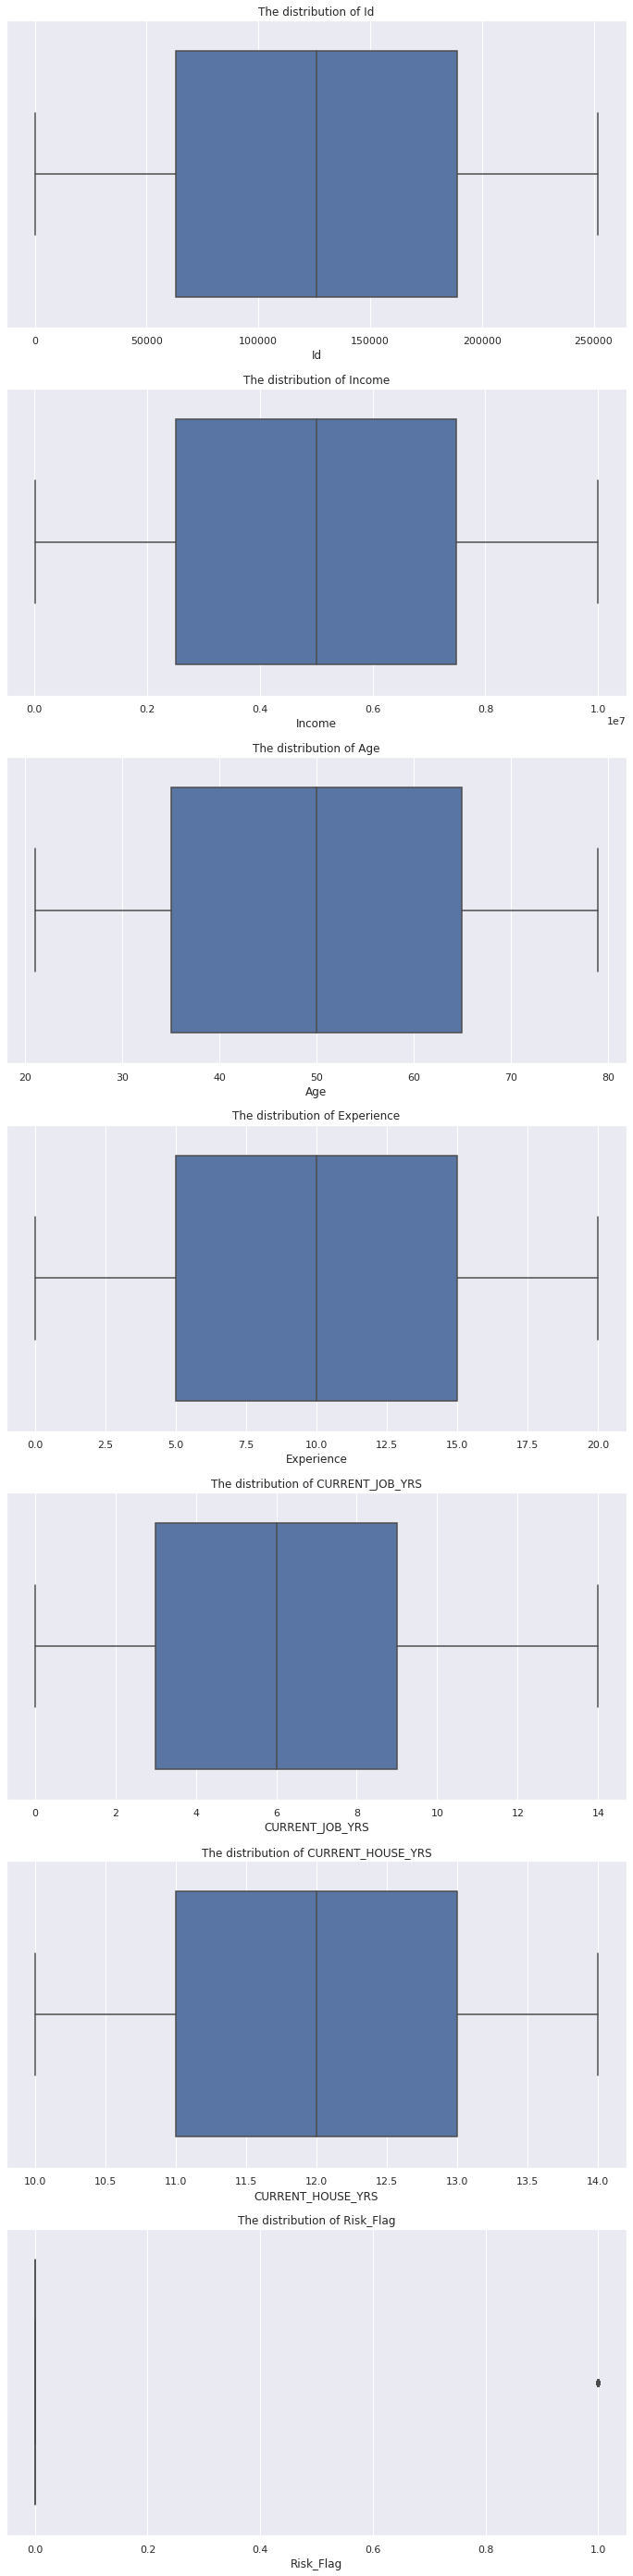

In [ ]:
# outliers
fig,ax=plt.subplots(len(num_cols),figsize=(12,50))
for i,cols in enumerate(num_cols):
  sns.boxplot(df[cols],ax=ax[i]) 
  ax[i].set_title('The distribution of '+format(cols))
plt.show()

#### Most outlier techniques are used to detect anomalous observations/samples that do not fit the typical/normal statistical distribution of a dataset.
*  IQR
*  Standard Deviation.
*  Z-score
*  Modified Z-score.


In [ ]:
# Correcting a wrong name in the set
df["House_Ownership"] = df["House_Ownership"].apply(lambda x: x.replace("norent_noown", "unknown"))

## 4. Answering Statistical Analysis questions

## 1. What is the overall default rate for loans in our dataset?

In [ ]:
# What is the overall default rate for loans in our dataset?
Defaulters=df['Risk_Flag'].value_counts()[1]
Non_defaulters=df['Risk_Flag'].value_counts()[0]
# Percentage of defaulters compared to non defaulters
print("Defaulters:",Defaulters/df['Risk_Flag'].count()*100,'%')
print("Non_defaulters:",Non_defaulters/df['Risk_Flag'].count()*100,'%')


Defaulters: 12.3 %
Non_defaulters: 87.7 %


#### Only 12.3 % of our customers default loans. Which in a business sense is good but in quest to reduce the risk of defaulting and revenue loss we need to understand the factors contributing to the defaults.

## 2. Can we identify any relationship between default rates and the borrower's income level?

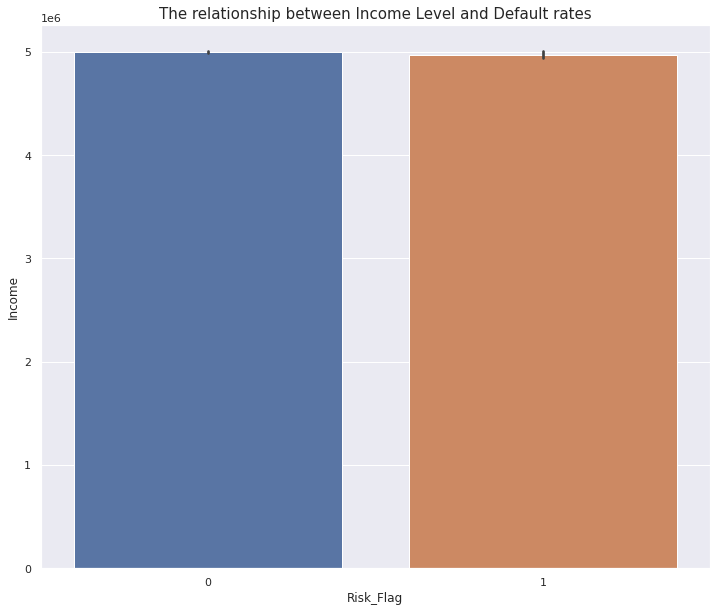

In [ ]:
# Can we identify any relationship between default rates and the borrower's income level?
fig,axes= plt.subplots(figsize=(12,10))
sns.barplot(data=df, x='Risk_Flag',y='Income',ax=axes)
axes.set_title("The relationship between Income Level and Default rates",fontsize=15)
plt.show()

High Income levels default Loans less than Low Income levels. The difference is infintesimally small you can split into income groups to get a good insight on the data on a granulay level

In [ ]:
# We need to divide the dataset into sections to understand customer's characteristics
data_eda=df.copy()
data_test=df.copy()
data_eda['Income_levels'] = data_eda['Income'].apply(lambda x: \
            'Low_income' if x<=3000000 else ('Middle_income' if 3000001 <= x <= 6000000 else "High_income"))
data_eda


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_levels
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,Low_income
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,High_income
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,Middle_income
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,High_income
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Middle_income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,High_income
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,Low_income
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,Middle_income
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,High_income


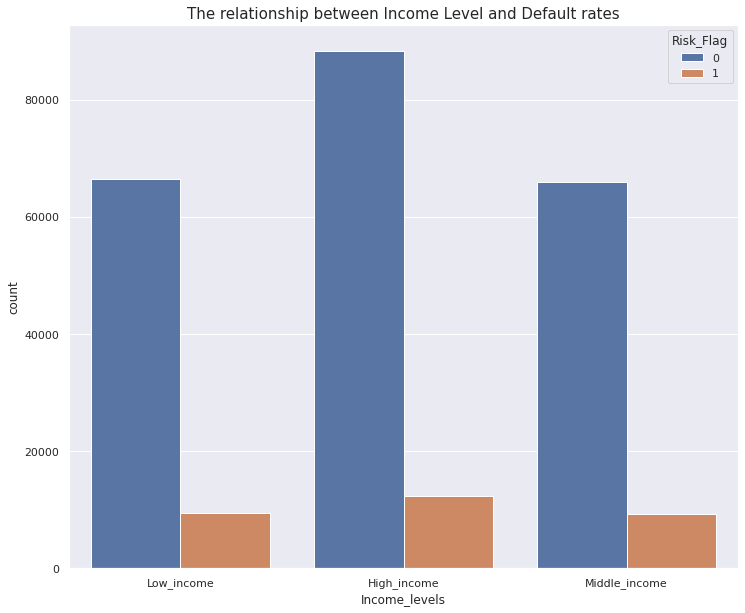

In [ ]:
# Can we identify any relationship between default rates and the borrower's income level?
fig,axes= plt.subplots(figsize=(12,10))
sns.countplot(data=data_eda, hue='Risk_Flag',x='Income_levels',ax=axes)
axes.set_title("The relationship between Income Level and Default rates",fontsize=15)
plt.show()

## 3. Are there any significant differences in default rates between different age groups?

In [ ]:
# Splitting age into groups
data_eda['Age_groups'] = data_eda['Age'].apply(lambda x: 'Young' if x<=30 else ('Middle_age' if 31 <= x <= 50 else "Elderly"))


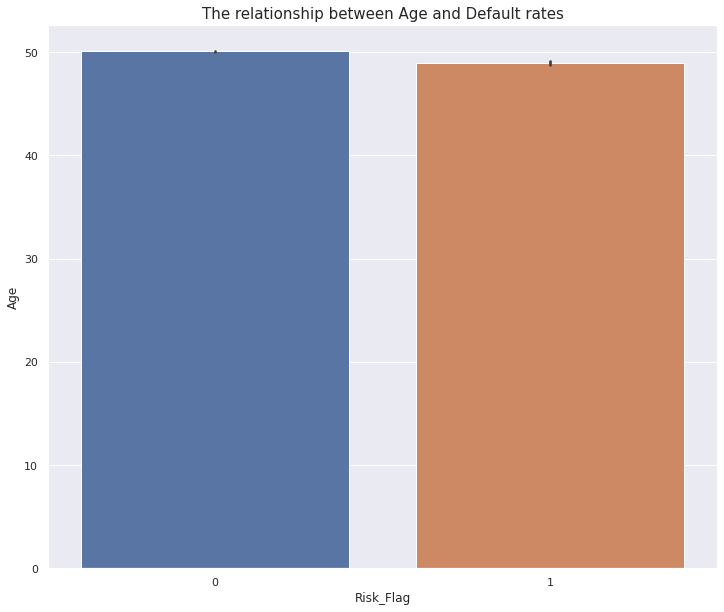

In [ ]:
# Age and risk factor relationship
fig,axes= plt.subplots(figsize=(12,10))
sns.barplot(data=data_eda, x='Risk_Flag',y='Age',ax=axes)
axes.set_title("The relationship between Age and Default rates",fontsize=15)
plt.show()

#### The Younger age groups default loans more. 

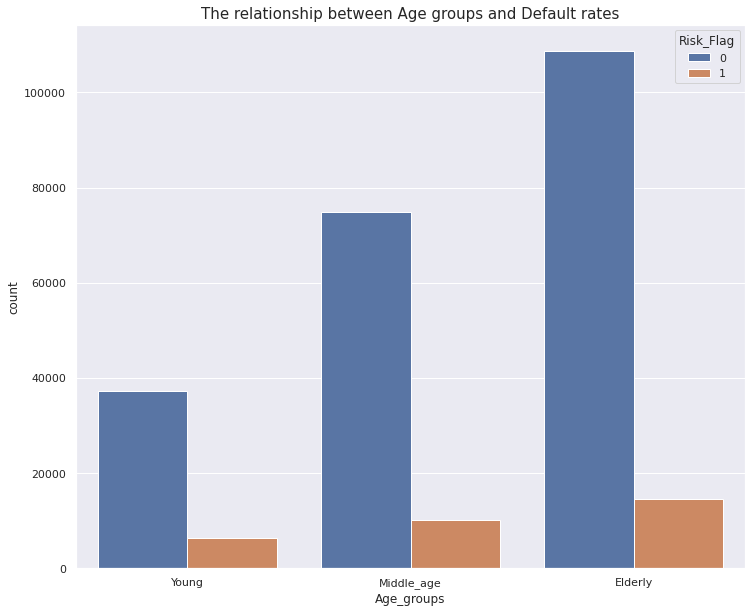

In [ ]:
# Can we identify any relationship between default rates and  borrowers age groups?
fig,axes= plt.subplots(figsize=(12,10))
sns.countplot(data=data_eda, hue='Risk_Flag',x='Age_groups',ax=axes)
axes.set_title("The relationship between Age groups and Default rates",fontsize=15)
plt.show()

## 4.Are there any significant differences in default rates between different experience levels?

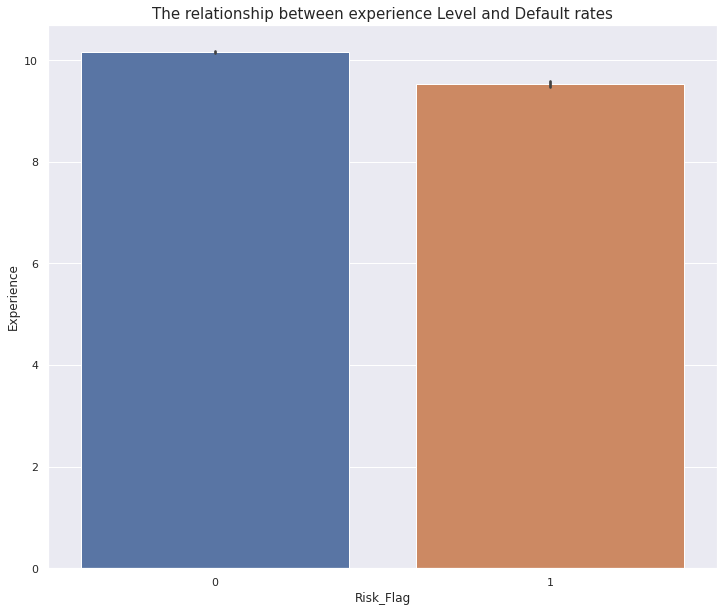

In [ ]:
# Default rates and experience level relationship
fig,axes= plt.subplots(figsize=(12,10))
sns.barplot(data=data_eda, x='Risk_Flag',y='Experience',ax=axes)
axes.set_title("The relationship between experience Level and Default rates",fontsize=15)
plt.show()

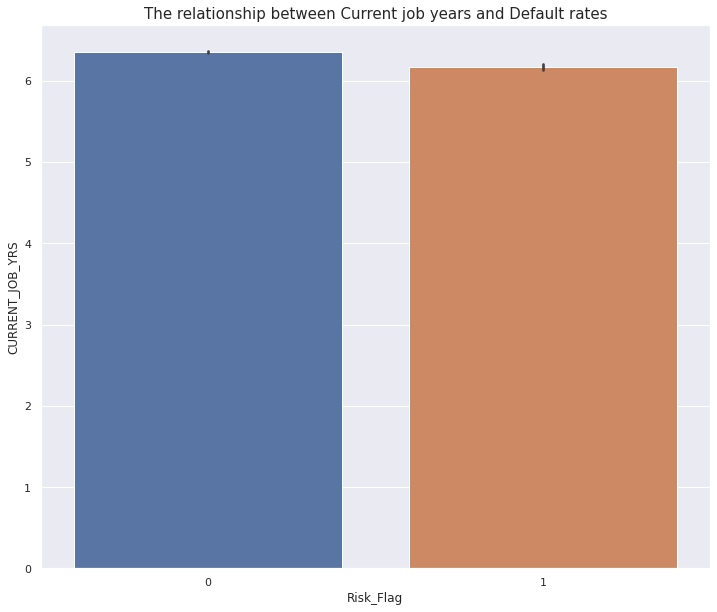

In [ ]:
# Default rates and experience level relationship
fig,axes= plt.subplots(figsize=(12,10))
sns.barplot(data=data_eda, x='Risk_Flag',y='CURRENT_JOB_YRS',ax=axes)
axes.set_title("The relationship between Current job years and Default rates",fontsize=15)
plt.show()

#### Correlation is evident in the experience level and the current job years relationship to the default rate.

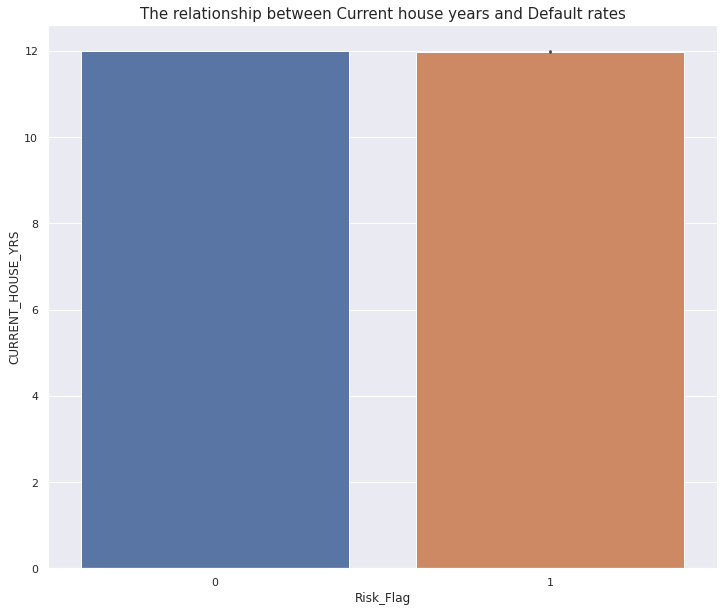

In [ ]:
# Default rates and experience level relationship
fig,axes= plt.subplots(figsize=(12,10))
sns.barplot(data=data_eda, x='Risk_Flag',y='CURRENT_HOUSE_YRS',ax=axes)
axes.set_title("The relationship between Current house years and Default rates",fontsize=15)
plt.show()

#### No significant difference.

## 5. Are there any specific segments of borrowers who have a higher default rate than others (e.g. married and single, those who own houses or cars?

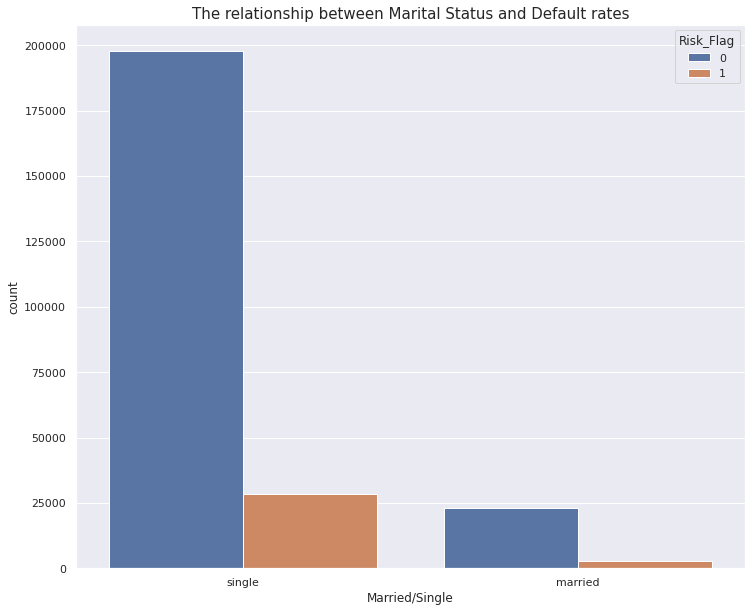

In [ ]:
# Default rate and marital status
fig,axes= plt.subplots(figsize=(12,10))
sns.countplot(data=data_eda, hue='Risk_Flag',x='Married/Single',ax=axes)
axes.set_title("The relationship between Marital Status and Default rates",fontsize=15)
plt.show()

#### Single people default loans more than married people.

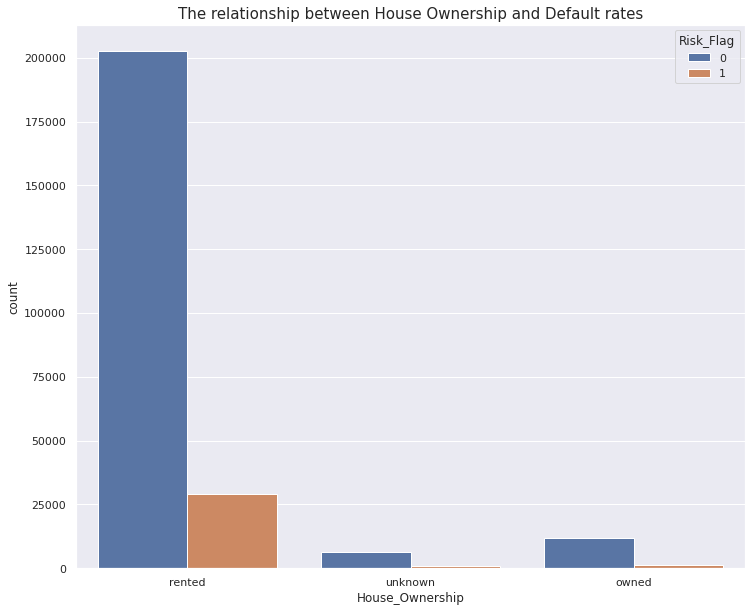

In [ ]:
# Default rate and house ownership
fig,axes= plt.subplots(figsize=(12,10))
sns.countplot(data=data_eda, hue='Risk_Flag',x='House_Ownership',ax=axes)
axes.set_title("The relationship between House Ownership and Default rates",fontsize=15)
plt.show()

#### People living in rental houses default more than people who own houses.

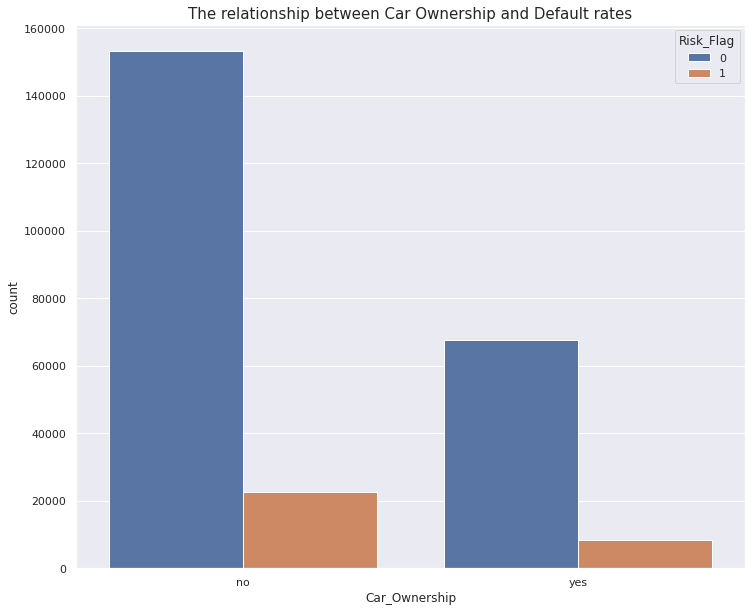

In [ ]:
# Default rate and Car ownership
fig,axes= plt.subplots(figsize=(12,10))
sns.countplot(data=data_eda, hue='Risk_Flag',x='Car_Ownership',ax=axes)
axes.set_title("The relationship between Car Ownership and Default rates",fontsize=15)
plt.show()

#### Individuals without Cars default less than those with cars. This is different from what we would assume under normal conditions.

## 6. Are all these factors associated with the income levels?? Assignment (Hypothesis testing)

In [ ]:
# Dropping unnecessary columns
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [ ]:
df=df.drop(['Id','Profession', 'CITY', 'STATE'],axis=1)
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,6,11,0
251996,2843572,26,10,single,rented,no,6,11,0
251997,4522448,46,7,single,rented,no,7,12,0
251998,6507128,45,0,single,rented,no,0,10,0


# Data preparation:
    - Label Encoding i.e Categorical Features
    - Data separation i.e Train and Test split
    

In [ ]:
# Encoding columns with two variables
label_encoder = LabelEncoder() 
for col in ['Married/Single','Car_Ownership']: df[col] = label_encoder.fit_transform( df[col])
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,rented,0,3,13,0
1,7574516,40,10,1,rented,0,9,13,0
2,3991815,66,4,0,rented,0,4,10,0
3,6256451,41,2,1,rented,1,2,12,1
4,5768871,47,11,1,rented,0,3,14,1


#### *Label Encoder- transforms and returns the encoded labels. In our Case Married/Single is given the value 0 and 1 respectively. Car ownership (Yes and No takes the value 1 and 0 respectively)* 



In [ ]:
# Encoding columns with more than two variables
onehot_encoder = OneHotEncoder(sparse = False)
df['House_Ownership'] = onehot_encoder.fit_transform(df['House_Ownership'].values.reshape(-1, 1) )
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,0.0,0,3,13,0
1,7574516,40,10,1,0.0,0,9,13,0
2,3991815,66,4,0,0.0,0,4,10,0
3,6256451,41,2,1,0.0,1,2,12,1
4,5768871,47,11,1,0.0,0,3,14,1


### *One hot encoder - Encode categorical features as a one-hot numeric array* 

# Model Creation, Testing and Extraction
    - Choose preffered ML algorithm (Check notes on notebook end.)
    - Instanciate the model
    - Identify your Predictor and Target Variables

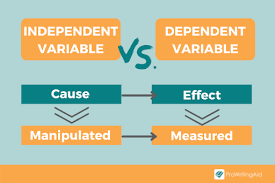

In [ ]:
# Identifying our predictor and target variable
x = df.drop(["Risk_Flag"], axis=1)
y = df["Risk_Flag"]
x

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,1,0.0,0,3,13
1,7574516,40,10,1,0.0,0,9,13
2,3991815,66,4,0,0.0,0,4,10
3,6256451,41,2,1,0.0,1,2,12
4,5768871,47,11,1,0.0,0,3,14
...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,0.0,0,6,11
251996,2843572,26,10,1,0.0,0,6,11
251997,4522448,46,7,1,0.0,0,7,12
251998,6507128,45,0,1,0.0,0,0,10


In [ ]:
# Since y is imbalanced we need to get a stratified sample (to cater for the imbalance in our set.
# Each set contains approximately the same percentage of samples of each target class as the complete set) 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)

In [ ]:
# Scalling our data by fiting them to a specific range
# Scaling using Standard Scaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Considering the gini impurity to split our sample
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
# Implementation of SMOTE - Synthetic Minority Over-sampling Technique which resamples the imbalanced dataset
smote_sampler = SMOTE(random_state=9)
pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])
# training the set
model=pipeline.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(x_test)

[[ 0.55965037  1.40879128 -0.34706808 ...  1.52392478 -0.91525093
   0.71662576]
 [ 0.57510792 -0.05611552  0.15267069 ... -0.65620037  1.2786155
  -1.42679785]
 [-0.77953586 -0.99365587 -1.34654563 ... -0.65620037 -1.18948424
   0.00215122]
 ...
 [ 1.07763777 -1.46242605  0.15267069 ... -0.65620037  0.45591559
  -1.42679785]
 [-0.31532616 -1.63821486  1.31872783 ... -0.65620037  0.45591559
   1.4311003 ]
 [-1.29660176 -0.87646333 -0.34706808 ... -0.65620037  0.45591559
   1.4311003 ]]


In [ ]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

### In defining our metric of sucess we need clearly define our margin of error, which is that error that minimizes risk. 

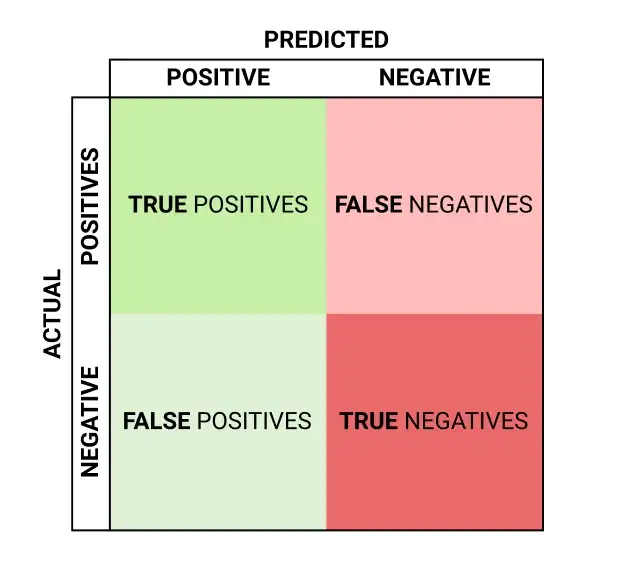

# Precision
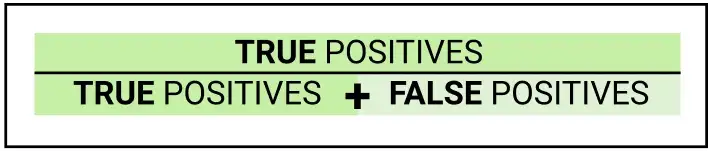

# Recall
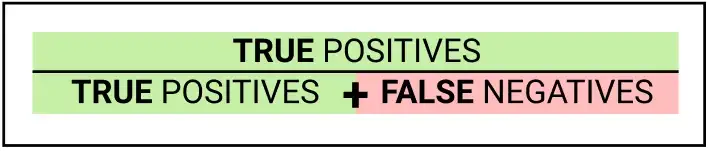

H0: Customer will pay a loan: 0.
H1: Customer will default a loan :1

* Type I error - Rejecting a null hypothesis that should not have been rejected. Labelling a customer as a defaulter when they are actually a Non-defaulter. False positive.
* Type II error - Failing to reject a null hypothesis that is false. Labelling a customer as a non-defaulter while they are a defaulter. False Negative.


We want to minimize the False Negatives - Issuing loans to defaulters 

# Model Evaluation

In [ ]:
# Evaluating the model
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, classification_report
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")


-------------------------TEST SCORES-----------------------
Recall: 78.1578
Precision: 52.5033
F1-Score: 62.812
Accuracy score: 88.6171
AUC Score: 84.1209



### Does our imbalanced class set affect our evaluation metrics?


# Model testing

In [ ]:
# Function
def loan_default_prediction():
  cols= x.columns
  # creating a dataframe with the features
  new_dataframe=pd.DataFrame(columns=cols)
  new_dataframe
  # creating an empty list
  col_values=[]
  # taking in input features 
  for i in cols:
    # Taking inputs from a user in string format
    dp=str(input(i))
    # appending to the empty list and printing it
    col_values.append(dp)
    print(dp)
  # Labeling the new data frame with the input values
  new_df=pd.DataFrame(data=col_values,index=cols)  
  new_df
  # Transposing the table and concatenating the values to the former dataframe
  transposed=new_df.transpose()
  transposed
  # Concatenating our new values to the empty dataset
  new_dataframe=pd.concat([new_dataframe,transposed],axis=0)
  new_dataframe.dtypes
  # Changing the numerical values to float
  numerical_cols=["Income","Age","Experience","CURRENT_JOB_YRS","CURRENT_HOUSE_YRS"]
  # Note that they are all string objects. ie, we will change numerical columns to float and encode categorical columns
  new_dataframe[numerical_cols]=new_dataframe[numerical_cols].astype(float)
  # Encoding features
  label_encoder = LabelEncoder() 
  for col in ['Married/Single','Car_Ownership']: new_dataframe[col] = label_encoder.fit_transform(new_dataframe[col])
  # one hot encoder for the multiclass labels
  onehot_encoder = OneHotEncoder(sparse = False)
  new_dataframe['House_Ownership'] = onehot_encoder.fit_transform(new_dataframe['House_Ownership'].values.reshape(-1, 1) )
  new_dataframe.head()
  # Defining my features
  x_feat=new_dataframe.values.reshape(1, -1)
  x_feat
  # Scaling
  scaler = StandardScaler()
  scaler.fit(x_train)
  # Transforming the test set
  x_feat = scaler.transform(x_feat)
  x_feat
  # # Using the Scaled features to perform prediction
  default_status=model.predict(x_feat)
  default_status
  # Output
  if default_status==[0]:
    print(' Customer will NOT default')
  else:
    print('Customer will default') 



In [ ]:
# packaging the model
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

### Topics that Might be interesting to check out


*   Dimensionality Reduction.
*   Feature Engineering. 
*   Multi Corlinearlity.
*   Heteroscedasticity.
*   Hyper-parameter Tuning.
*   Cross-validation.




# Thank You for Coming.

## Following Blogs Helped in the creating of this Workshop Notebook.

1. [Basic Introduction to Data Science Pipeline](https://www.analyticsvidhya.com/blog/2022/08/basic-introduction-to-data-science-pipeline/) 

2. [Build a Web App with Python’s Flask on Google Colab in 2 Minutes](https://medium.com/the-research-nest/build-a-web-app-with-pythons-flask-on-google-colab-in-2-minutes-e2cade485488)

3. [Predicting Possible Loan Default Using Machine Learning](https://www.analyticsvidhya.com/blog/2022/04/predicting-possible-loan-default-using-machine-learning/)


[]()
[]()
[]()
[]()
[]()

# -- NOTES --
There are many different types of machine learning models, each of which is suited to a particular problem and set of data. Here are some common types of machine learning models:
---
1. Linear regression: This is a simple model that is used for predicting a numerical value. It assumes that there is a linear relationship between the input variables and the output variable.

2. Logistic regression: This is a model that is used for classification tasks, where the output is a binary variable (e.g., 0 or 1). It is a variation of linear regression that uses a logistic function to predict the probability of a particular outcome.

3. Decision trees: This is a model that uses a tree-like structure to make predictions. Each node in the tree represents a decision point, and the branches represent the possible outcomes of that decision.

4. Random forest: This is an ensemble model that uses multiple decision trees to make predictions. It is more accurate than a single decision tree, but also more computationally expensive.

5. Neural networks: This is a complex model that is composed of multiple layers of interconnected "neurons." It is highly flexible and can model complex patterns in data, but is also more difficult to train and interpret than other models.

7. Support vector machines: This is a model that is used for classification tasks. It works by finding the best boundary between different classes in the data.

8. K-means clustering: This is an unsupervised learning algorithm that is used for clustering. It works by dividing the data into a specified number of clusters based on their similarity.
---
These are just a few examples of the many different types of machine learning models. The best model for a particular problem will depend on the specific data and the goals of the model.

# Books to consider
1. 